<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/SEIRDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

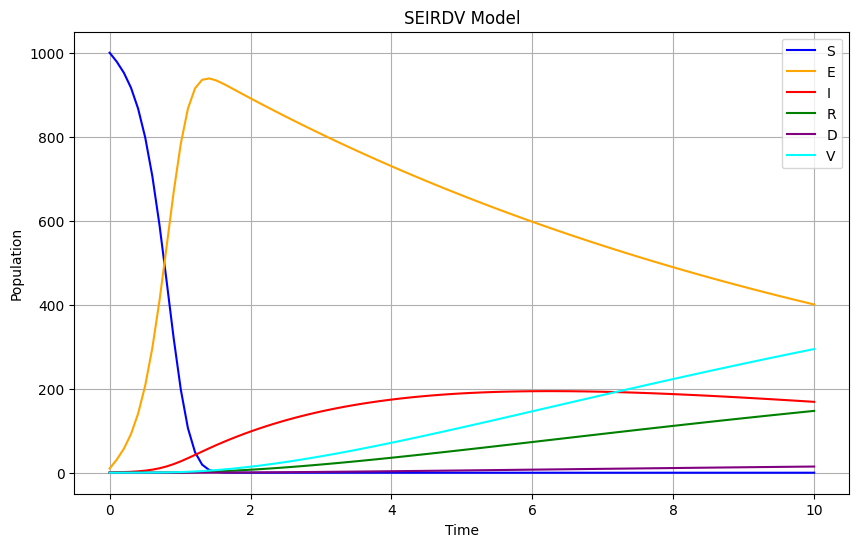

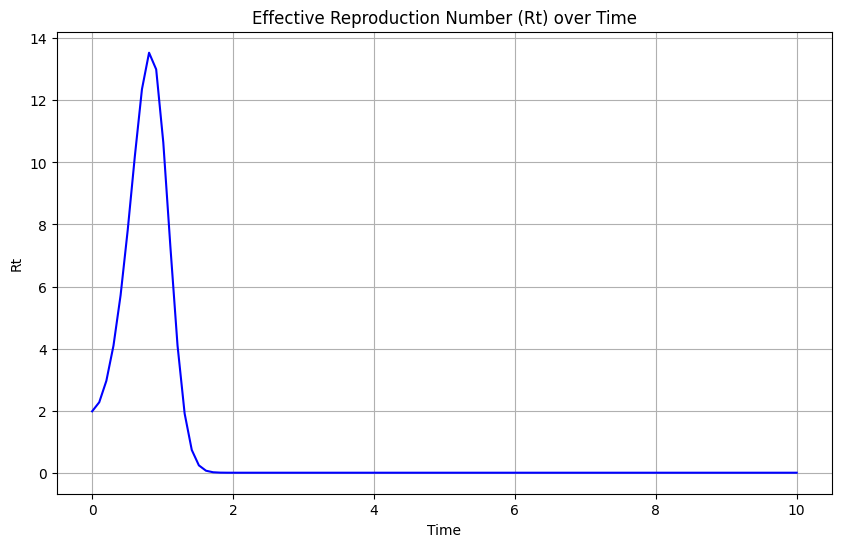

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define your SEIRDV model equations
def seirdv_model(state, t, beta, gamma, mu, delta, rho):
    S, E, I, R, D, V = state

    # Define the model equations
    dS = -beta * S * I
    dE = beta * S * I - delta * E
    dI = delta * E - gamma * I - rho * I
    dR = gamma * I
    dD = mu * I
    dV = rho * I

    # Return the derivatives
    return [dS, dE, dI, dR, dD, dV]

# Set the initial conditions
initial_state = [1000, 10, 1, 0, 0, 0]  # S, E, I, R, D, V

# Set the time points for integration
t = np.linspace(0, 10, 100)

# Define the model parameters
beta = 0.2
gamma = 0.1
mu = 0.01
delta = 0.1
rho = 0.2

# Integrate the system of differential equations
output = odeint(seirdv_model, initial_state, t, args=(beta, gamma, mu, delta, rho))

# Access the solution
S, E, I, R, D, V = output[:, 0], output[:, 1], output[:, 2], output[:, 3], output[:, 4], output[:, 5]

# Calculate the effective reproduction number (Rt)
Rt = beta * (S / np.sum(initial_state)) * I / gamma

# Plotting the trajectories
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S', color='blue')
plt.plot(t, E, label='E', color='orange')
plt.plot(t, I, label='I', color='red')
plt.plot(t, R, label='R', color='green')
plt.plot(t, D, label='D', color='purple')
plt.plot(t, V, label='V', color='cyan')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SEIRDV Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Rt over time
plt.figure(figsize=(10, 6))
plt.plot(t, Rt, label='Rt', color='blue')
plt.xlabel('Time')
plt.ylabel('Rt')
plt.title('Effective Reproduction Number (Rt) over Time')
plt.grid(True)
plt.show()
